In [1]:
from pubg_util import mysql, load_schema, notifier
from sphynx import sphynx, NODE_SMALL, NODE_MEDIUM, NODE_LARGE
from pyspark.sql.functions import *
import pandas as pd
import pickle

spark = sphynx.get_spark(executor_count=16, app_name='workshop', node_spec=NODE_LARGE)

Spark cluster not assigned. creating a new one...
Node spec: 16 executors with 48G RAM each
Job Port 4049 is assigned for requested cluster
Waiting for Spark master to be available...
Spark master launched!
Creating new Spark session, name: workshop...
Waiting for all executors ready...
All executors connected!
Complete! elapsed time: 00:00:31


In [6]:
gcoin_2.groupBy("category", "sub_category").agg(count("*")).show(truncate=False)

+-----------+-------------------+--------+
|category   |sub_category       |count(1)|
+-----------+-------------------+--------+
|other      |battlestat_swap_kit|2243    |
|null       |null               |111588  |
|other      |nickname_change    |60537   |
|crates&keys|key                |130884  |
|skin       |weapon             |473742  |
|skin       |battlestat         |43931   |
|other      |emotes             |872539  |
|other      |presetslot         |6081    |
|skin       |gear               |221364  |
|crates&keys|crate              |5388264 |
|skin       |vehicle            |28884   |
|skin       |costume            |892429  |
+-----------+-------------------+--------+



In [14]:
gcoin_2.where(col("sub_category").isin(["costume", "gear", "vehicle"])).groupBy("price").agg(count("*")).orderBy("price").show(truncate=False)

+-----+--------+
|price|count(1)|
+-----+--------+
|40   |2839    |
|60   |19137   |
|70   |7337    |
|80   |14752   |
|90   |9572    |
|100  |12717   |
|120  |18884   |
|140  |12899   |
|150  |72553   |
|170  |4455    |
|180  |5520    |
|200  |310029  |
|210  |6653    |
|240  |9908    |
|250  |31334   |
|280  |10309   |
|290  |6935    |
|300  |149548  |
|320  |8376    |
|350  |50604   |
+-----+--------+
only showing top 20 rows



In [27]:
gcoin_2.where(col("sub_category").isin(["costume", "gear", "vehicle"])).groupBy("price").agg(count("*")).orderBy("price", ascending=False).show(truncate=False)

+-----+--------+
|price|count(1)|
+-----+--------+
|1490 |10482   |
|1190 |817     |
|1090 |691     |
|1040 |1097    |
|1000 |3646    |
|990  |37252   |
|900  |354     |
|890  |981     |
|800  |4566    |
|740  |1371    |
|700  |46856   |
|690  |3293    |
|600  |12454   |
|590  |10167   |
|560  |980     |
|500  |170629  |
|490  |13129   |
|480  |2494    |
|440  |1193    |
|420  |4110    |
+-----+--------+
only showing top 20 rows



In [16]:
gcoin_2.where((col("sub_category").isin(["costume", "gear", "vehicle"])) & (col("price") > 900)).select("product_name", "price").distinct().show(truncate=False)

+------------------------+-----+
|product_name            |price|
+------------------------+-----+
|GodV's Onesie           |1000 |
|Vigilante Bodysuit      |1490 |
|"Snake Hunter" BRDM-2   |990  |
|Mermaid Outfit          |1490 |
|Wild Cat Hoodie         |990  |
|Blood Hound Jacket      |990  |
|Queen of Hearts Dress   |1490 |
|"Ocean Fantasy" Aquarail|990  |
|Plaid Sugarplum Skirt   |990  |
|Season's Greetings Dress|990  |
|Ringmaster's Jacket     |990  |
|Festive Fur Coat        |990  |
|"Hippie Soul" Aquarail  |990  |
|Divemaster Suit         |1040 |
|Jeremy Lin Jacket       |990  |
|"Range Shredder" Zima   |990  |
|Lobster Costume         |1090 |
|Vigilante Bodysuit      |1040 |
|Circus Star Uniform     |1190 |
|Proper Pink Outfit      |1490 |
+------------------------+-----+
only showing top 20 rows



In [209]:
gcoin_skin_df_2[gcoin_skin_df_2.price >= 800].groupby(["price", "product_name"])["account_id"].count().reset_index().sort_values("price")

,price,product_name,account_id
0,800,Polar Bear Suit,1783
1,800,Sideshow Bear Costume,2783
2,890,Vigilante Bodysuit,981
3,900,Groovy Gown,354
16,990,Wild Cat Hoodie,5155
15,990,Vigilante Jacket,5260
14,990,Season's Greetings Dress,2591
13,990,Ringmaster's Jacket,3560
11,990,Jeremy Lin Jacket,9149
10,990,Festive Fur Coat,1157


In [202]:
gcoin_skin_df_2.groupby("price").apply(lambda x: len(x)).reset_index()

,price,0
0,40,2839
1,60,19137
2,70,7337
3,80,14752
4,90,9572
5,100,12717
6,120,18884
7,140,12899
8,150,72553
9,170,4455


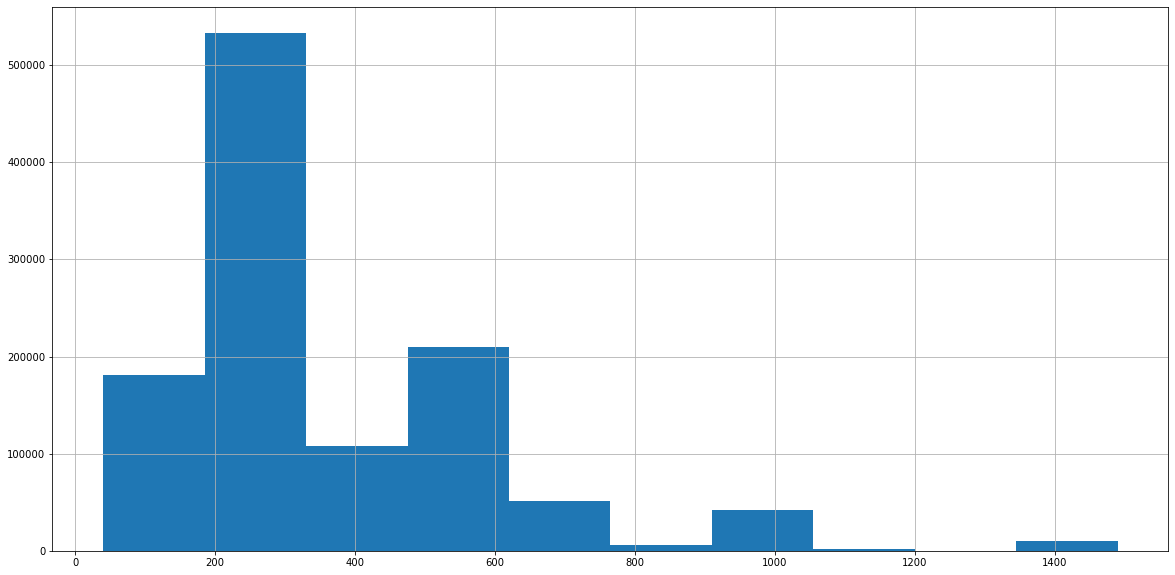

In [204]:
gcoin_skin_df_2["price"].hist(figsize=(20,10))

In [103]:
# 1
def get_group_a_seg_1(df, wsus_user):
    df.price_ = df.price_.astype(int)
    df = df[~df.account_id.isin(wsus_user)].groupby("account_id", as_index=False)["price_"].sum()
    print(df[df.price_ <= 500].account_id.nunique())
    print(df[(df.price_ > 500) & (df.price_ <= 1500)].account_id.nunique())
    print(df[(df.price_ > 1500) & (df.price_ <= 2500)].account_id.nunique())
    print(df[(df.price_ > 2500) & (df.price_ <= 20000)].account_id.nunique())
    print(df[(df.price_ > 20000)].account_id.nunique())

In [128]:
# 2
def get_group_a_seg_2(df, wsus_user):
    df.price_ = df.price_.astype(int)
    df = df[~df.account_id.isin(wsus_user)].groupby("account_id", as_index=False)["price_"].sum()
    print(df[df.price_ <= 500].account_id.nunique())
    print(df[(df.price_ > 500) & (df.price_ <= 2500)].account_id.nunique())
    print(df[(df.price_ > 2500) & (df.price_ <= 5000)].account_id.nunique())
    print(df[(df.price_ > 5000) & (df.price_ <= 30000)].account_id.nunique())
    print(df[(df.price_ > 30000)].account_id.nunique())

In [120]:
# 3
def get_group_a_seg_3(df, wsus_user):
    df.price_ = df.price_.astype(int)
    df = df[~df.account_id.isin(wsus_user)].groupby("account_id", as_index=False)["price_"].sum()
    print(df[df.price_ <= 1000].account_id.nunique())
    print(df[(df.price_ > 1000) & (df.price_ <= 5000)].account_id.nunique())
    print(df[(df.price_ > 5000) & (df.price_ <= 10000)].account_id.nunique())
    print(df[(df.price_ > 10000) & (df.price_ <= 30000)].account_id.nunique())
    print(df[(df.price_ > 30000)].account_id.nunique())

## 2022 - Feb

In [5]:
gcoin_2 = load_data_mart("pc", "2022-02-01", "2022-02-28", "gcoin_use")

In [18]:
wsus_pu_list_2 = gcoin_2.where(col("event_name").like("%wsus%")).select("account_id").distinct().toPandas()["account_id"].tolist()

In [22]:
import pickle
with open("../Data/wsus_pu_list_2.txt", "wb") as f:
    pickle.dump(wsus_pu_list_2, f)

In [11]:
gcoin_skin_2 = gcoin_2.where((col("sub_category").isin(["costume", "gear", "vehicle"])))

In [14]:
gcoin_crate_2 = gcoin_2.where((col("sub_category") == "crate") & (~lower(col("event_name")).like("%wsus%")))

In [16]:
gcoin_skin_df_2 = gcoin_skin_2.toPandas()
gcoin_skin_df_2.to_csv("../Data/gcoin_skin_df_2.csv", index=False)
gcoin_crate_df_2 = gcoin_crate_2.toPandas()
gcoin_crate_df_2.to_csv("../Data/gcoin_crate_df_2.csv", index=False)

In [28]:
import re
gcoin_crate_df_2.product_name.str.contains("weapon", flags=re.IGNORECASE)

0         False
1         False
2         False
3         False
4         False
5         False
6          True
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
986900     True
986901    False
986902    False
986903    False
986904    False
986905    False
986906    False
986907    False
986908    False
986909    False
986910    False
986911    False
986912    False
986913    False
986914    False
986915    False
986916    False
986917    False
986918    False
986919    False
986920    False
986921    False
986922    False
986923    False
986924    False
986925    False
986926    False
986927    False
986928     True
986929    False
Name: product_name, Leng

In [30]:
gcoin_skin_df_2 = pd.read_csv("../Data/gcoin_skin_df_2.csv")
gcoin_skin_df_2 = pd.concat([gcoin_skin_df_2, gcoin_crate_df_2])

In [28]:
gcoin_wsus_df_2 = gcoin_2.where((col("event_name").like("%wsus%"))).toPandas()
gcoin_wsus_df_2.to_csv("../Data/gcoin_wsus_df_2.csv", index=False)

In [37]:
gcoin_wsus_df_2 = pd.read_csv("../Data/gcoin_wsus_df_2.csv")
wsus_pu_list_2 = gcoin_wsus_df_2["account_id"].unique().tolist()

New Gatcha (NO Wsus PU)

In [29]:
no_wsus_df = gcoin_skin_df_2[(~gcoin_skin_df_2.account_id.isin(wsus_pu_list_2))]

In [120]:
set_pu = no_wsus_df[no_wsus_df.price >= 800].account_id.unique().tolist()

In [99]:
user_set_buy_cnt = no_wsus_df[(no_wsus_df.account_id.isin(set_pu)) & (no_wsus_df.price >= 800)]\
    .groupby("account_id", as_index=False)["product_name"].count()
user_set_buy_cnt.columns = ["account_id", "buy_cnt"]

In [100]:
user_set_buy_cnt.groupby("buy_cnt")["account_id"].count()

buy_cnt
1    41991
2      582
3       38
4        4
5        5
6        3
Name: account_id, dtype: int64

In [126]:
user_set_buy_cnt[user_set_buy_cnt.buy_cnt >= 6]

,account_id,buy_cnt
7546,account.2dcc0fe315b24c08bc894f46fea82973,6
9226,account.37df8c26aac4400f9ac2864f809591c4,6
16188,account.623741919a9e4362918eee923b6721ab,6


In [107]:
no_set_user_buy_cnt = no_wsus_df[(~no_wsus_df.account_id.isin(set_pu)) & (no_wsus_df.price < 800)]\
    .groupby("account_id", as_index=False)["product_name"].count()
no_set_user_buy_cnt.columns = ["account_id", "buy_cnt"]

In [109]:
no_set_user_buy_cnt.groupby("buy_cnt")["account_id"].count().reset_index()

,buy_cnt,account_id
0,1,441646
1,2,117969
2,3,24779
3,4,6750
4,5,1776
5,6,463
6,7,143
7,8,45
8,9,16
9,10,10


In [95]:
# 1
get_group_a_seg_1(gcoin_skin_df_2, wsus_pu_list_2)

413609
416465
196926
79707
8


In [129]:
# 2
get_group_a_seg_2(gcoin_skin_df_2, wsus_pu_list_2)

413609
613391
76175
3538
2


In [130]:
# 2
get_group_a_seg_2(gcoin_skin_df_3, wsus_pu_list_3)

223668
590012
67575
16318
2


In [131]:
# 2
get_group_a_seg_2(gcoin_skin_df_4, wsus_pu_list_4)

194202
499456
101573
53188
5


In [121]:
# 3
get_group_a_seg_3(gcoin_skin_df_2, wsus_pu_list_2)

587314
515861
3379
159
2


In [122]:
# 3
get_group_a_seg_3(gcoin_skin_df_3, wsus_pu_list_3)

521734
359521
14613
1705
2


In [123]:
# 3
get_group_a_seg_3(gcoin_skin_df_4, wsus_pu_list_4)

378981
416250
48150
5038
5


In [113]:
# 4
get_group_a_seg_4(gcoin_skin_df_2, wsus_pu_list_2)

587314
478343
40897
159
2


Gatcha (WSUS PU)

In [38]:
wsus_skin_df = gcoin_skin_df_2[(gcoin_skin_df_2.account_id.isin(wsus_pu_list_2))]

In [39]:
wsus_cnt = gcoin_wsus_df_2.price.apply(lambda x: 10 if x == 1800 else 1)
gcoin_wsus_df_2["wsus_cnt"] = wsus_cnt

In [40]:
wsus_user_skin_use = wsus_skin_df.groupby("account_id", as_index=False)["price"].sum()
wsus_user_wsus_use = gcoin_wsus_df_2.groupby("account_id", as_index=False)[["price", "wsus_cnt"]].sum()
wsus_user_skin_use.columns=["account_id", "skin_use"]
wsus_user_wsus_use.columns = ["account_id", "wsus_use", "wsus_cnt"]
wsus_user_use = pd.merge(wsus_user_skin_use, wsus_user_wsus_use, on="account_id", how="outer")

In [41]:
wsus_user_use["rate"] = (wsus_user_use.wsus_use/wsus_user_use.skin_use)

In [42]:
# wsus 구매하지만 costume은 사지않는 유저
wsus_user_use[wsus_user_use.rate.isna()].account_id.nunique()

992939

In [43]:
# wsus, costume 둘다 구매하는 유저
wsus_user_use[~wsus_user_use.rate.isna()].account_id.nunique()

323431

In [45]:
992939/323431

3.0700180254830243

In [44]:
wsus_user_use[~wsus_user_use.rate.isna()].describe()

,skin_use,wsus_use,wsus_cnt,rate
count,323431.000000,323431.000000,323431.000000,323431.000000
mean,1012.817046,3231.318581,17.632537,4.571701
std,1213.182221,12908.559034,71.550183,25.577803
min,40.000000,200.000000,1.000000,0.010828
25%,390.000000,200.000000,1.000000,0.310078
50%,750.000000,400.000000,2.000000,0.800000
75%,1290.000000,1200.000000,6.000000,2.400000
max,56080.000000,491400.000000,2730.000000,3722.857143


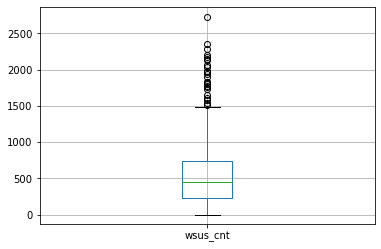

In [176]:
wsus_user_use[~wsus_user_use.rate.isna()].groupby("wsus_cnt")["account_id"].count().reset_index().boxplot("wsus_cnt")

In [72]:
import numpy as np
costume_wsus = wsus_user_use[~wsus_user_use.rate.isna()]
costume_user_group = np.where(
    costume_wsus["wsus_cnt"].between(1, 3), 1,
    np.where(
        costume_wsus["wsus_cnt"].between(4, 15), 3,
        np.where(
            costume_wsus["wsus_cnt"].between(16, 30), 7,
            np.where(
                costume_wsus["wsus_cnt"].between(31, 240), 45,
                np.where(
                    costume_wsus["wsus_cnt"] >= 241, 100, 0
                )
            )
        )
    )
)

costume_wsus["group"] = costume_user_group

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [73]:
costume_wsus.groupby("group", as_index=False)["account_id"].count()

,group,account_id
0,1,205405
1,3,74621
2,7,13994
3,45,24307
4,100,5104


In [141]:
wsus_user_use[wsus_user_use.rate.isna()].describe()

,skin_use,wsus_use,wsus_cnt,rate
count,0.0,1.122319e+06,1.122319e+06,0.0
mean,NaN,1.726857e+03,9.319467e+00,NaN
std,NaN,6.956938e+03,3.854830e+01,NaN
min,NaN,2.000000e+02,1.000000e+00,NaN
25%,NaN,2.000000e+02,1.000000e+00,NaN
50%,NaN,4.000000e+02,2.000000e+00,NaN
75%,NaN,1.800000e+03,1.000000e+01,NaN
max,NaN,7.374000e+05,4.096000e+03,NaN


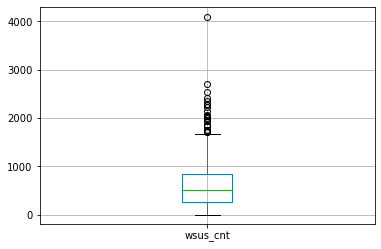

In [177]:
wsus_user_use[wsus_user_use.rate.isna()].groupby("wsus_cnt")["account_id"].count().reset_index().boxplot("wsus_cnt")

In [74]:
no_costume_wsus = wsus_user_use[wsus_user_use.rate.isna()]
no_costume_user_group = np.where(
    no_costume_wsus["wsus_cnt"].between(1, 10), 1,
    np.where(
        no_costume_wsus["wsus_cnt"].between(11, 50), 3,
        np.where(
            no_costume_wsus["wsus_cnt"].between(51, 100), 7,
            np.where(
                no_costume_wsus["wsus_cnt"].between(101, 800), 45,
                np.where(
                    no_costume_wsus["wsus_cnt"] >= 801, 100, 0
                )
            )
        )
    )
)

no_costume_wsus["group"] = no_costume_user_group

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [75]:
no_costume_wsus.groupby("group", as_index=False)["account_id"].count()

,group,account_id
0,1,905357
1,3,65960
2,7,11653
3,45,9716
4,100,253


In [214]:
no_costume_wsus = wsus_user_use[wsus_user_use.rate.isna()]
no_costume_user_group = np.where(
    no_costume_wsus["wsus_cnt"].between(1, 20), 1,
    np.where(
        no_costume_wsus["wsus_cnt"].between(21, 100), 3,
        np.where(
            no_costume_wsus["wsus_cnt"].between(101, 200), 7,
            np.where(
                no_costume_wsus["wsus_cnt"].between(201, 1599), 45,
                np.where(
                    no_costume_wsus["wsus_cnt"] >= 1601, 100, 0
                )
            )
        )
    )
)

no_costume_wsus["group"] = no_costume_user_group

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [215]:
no_costume_wsus.groupby("group", as_index=False)["account_id"].count()

,group,account_id
0,1,1063849
1,3,43935
2,7,8628
3,45,5877
4,100,30


## 2022-March

In [47]:
gcoin_3 = load_data_mart("pc", "2022-03-01", "2022-03-31", "gcoin_use")

In [94]:
gcoin_skin_3 = gcoin_3.where((col("sub_category").isin(["costume", "gear", "vehicle"])))

In [96]:
gcoin_skin_df_3 = gcoin_skin_3.toPandas()
gcoin_skin_df_3.to_csv("../Data/gcoin_skin_df_3.csv", index=False)

In [48]:
gcoin_crate_3 = gcoin_3.where((col("sub_category") == "crate") & (~lower(col("event_name")).like("%wsus%")))
gcoin_crate_df_3 = gcoin_crate_3.toPandas()
gcoin_crate_df_3.to_csv("../Data/gcoin_crate_df_3.csv", index=False)

In [50]:
gcoin_skin_df_3 = pd.read_csv("../Data/gcoin_skin_df_3.csv")
gcoin_skin_df_3 = pd.concat([gcoin_skin_df_3, gcoin_crate_df_3])

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16,19,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [97]:
# gcoin_wsus_df_3 = gcoin_3.where((col("event_name").like("%wsus%"))).toPandas()
# gcoin_wsus_df_3.to_csv("../Data/gcoin_wsus_df_3.csv", index=False)

In [49]:
gcoin_wsus_df_3 = pd.read_csv("../Data/gcoin_wsus_df_3.csv")
wsus_pu_list_3 = gcoin_wsus_df_3.account_id.unique().tolist()

NEW GATCHA

In [111]:
no_wsus_df3 = gcoin_skin_df_3[(~gcoin_skin_df_3.account_id.isin(wsus_pu_list_3))]

In [113]:
set_pu3 = no_wsus_df3[no_wsus_df3.price >= 800].account_id.unique().tolist()

In [114]:
user_set_buy_cnt3 = no_wsus_df3[(no_wsus_df3.account_id.isin(set_pu3)) & (no_wsus_df3.price >= 800)]\
    .groupby("account_id", as_index=False)["product_name"].count()
user_set_buy_cnt3.columns = ["account_id", "buy_cnt"]

In [115]:
user_set_buy_cnt3.groupby("buy_cnt")["account_id"].count()

buy_cnt
1    31015
2      430
3       23
4        5
5        2
Name: account_id, dtype: int64

In [116]:
no_set_user_buy_cnt3 = no_wsus_df3[(~no_wsus_df3.account_id.isin(set_pu3)) & (no_wsus_df3.price < 800)]\
    .groupby("account_id", as_index=False)["product_name"].count()
no_set_user_buy_cnt3.columns = ["account_id", "buy_cnt"]

In [117]:
no_set_user_buy_cnt3.groupby("buy_cnt")["account_id"].count().reset_index()

,buy_cnt,account_id
0,1,250977
1,2,64385
2,3,12620
3,4,3739
4,5,1028
5,6,269
6,7,91
7,8,33
8,9,17
9,10,4


In [96]:
get_group_a_seg(gcoin_skin_df_3, wsus_pu_list_3)

223668
465901
124111
83848
47


Gatcha (WSUS PU)

In [51]:
wsus_skin_df3 = gcoin_skin_df_3[(gcoin_skin_df_3.account_id.isin(wsus_pu_list_3))]

In [52]:
wsus_cnt = gcoin_wsus_df_3.price.apply(lambda x: 10 if x == 1800 else 1)
gcoin_wsus_df_3["wsus_cnt"] = wsus_cnt

In [53]:
wsus_user_skin_use3 = wsus_skin_df3.groupby("account_id", as_index=False)["price"].sum()
wsus_user_wsus_use3 = gcoin_wsus_df_3.groupby("account_id", as_index=False)[["price", "wsus_cnt"]].sum()
wsus_user_skin_use3.columns=["account_id", "skin_use"]
wsus_user_wsus_use3.columns = ["account_id", "wsus_use", "wsus_cnt"]
wsus_user_use3 = pd.merge(wsus_user_skin_use3, wsus_user_wsus_use3, on="account_id", how="outer")

In [54]:
wsus_user_use3["rate"] = (wsus_user_use3.wsus_use/wsus_user_use3.skin_use)

In [55]:
# wsus 구매하지만 costume은 사지않는 유저
wsus_user_use3[wsus_user_use3.rate.isna()].account_id.nunique()

661361

In [56]:
# wsus, costume 둘다 구매하는 유저
wsus_user_use3[~wsus_user_use3.rate.isna()].account_id.nunique()

315446

In [58]:
661361/315446

2.096590224634327

In [57]:
wsus_user_use3[~wsus_user_use3.rate.isna()].describe()

,skin_use,wsus_use,wsus_cnt,rate
count,315446.000000,315446.000000,315446.000000,315446.000000
mean,1850.408121,3870.135618,21.129531,2.394795
std,2118.568334,12534.809355,69.444956,11.169382
min,40.000000,200.000000,1.000000,0.007678
25%,990.000000,200.000000,1.000000,0.202020
50%,1000.000000,600.000000,3.000000,0.606061
75%,1990.000000,2000.000000,11.000000,1.750000
max,53120.000000,649600.000000,3608.000000,1563.333333


In [76]:
costume_wsus3 = wsus_user_use3[~wsus_user_use3.rate.isna()]
costume_user_group3 = np.where(
    costume_wsus3["wsus_cnt"].between(1, 3), 1,
    np.where(
        costume_wsus3["wsus_cnt"].between(4, 15), 3,
        np.where(
            costume_wsus3["wsus_cnt"].between(16, 30), 7,
            np.where(
                costume_wsus3["wsus_cnt"].between(31, 240), 45,
                np.where(
                    costume_wsus3["wsus_cnt"] >= 241, 100, 0
                )
            )
        )
    )
)

costume_wsus3["group"] = costume_user_group3

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [77]:
costume_wsus3.groupby("group", as_index=False)["account_id"].count()

,group,account_id
0,1,168020
1,3,83467
2,7,21863
3,45,37127
4,100,4969


In [154]:
wsus_user_use3[wsus_user_use3.rate.isna()].describe()

,skin_use,wsus_use,wsus_cnt,rate
count,0.0,859397.000000,859397.000000,0.0
mean,NaN,1642.679460,8.843404,NaN
std,NaN,6125.428944,33.926307,NaN
min,NaN,200.000000,1.000000,NaN
25%,NaN,200.000000,1.000000,NaN
50%,NaN,400.000000,2.000000,NaN
75%,NaN,1800.000000,9.000000,NaN
max,NaN,560600.000000,3114.000000,NaN


In [78]:
no_costume_wsus3 = wsus_user_use3[wsus_user_use3.rate.isna()]
no_costume_user_group3 = np.where(
    no_costume_wsus3["wsus_cnt"].between(1, 10), 1,
    np.where(
        no_costume_wsus3["wsus_cnt"].between(11, 50), 3,
        np.where(
            no_costume_wsus3["wsus_cnt"].between(51, 100), 7,
            np.where(
                no_costume_wsus3["wsus_cnt"].between(101, 800), 45,
                np.where(
                    no_costume_wsus3["wsus_cnt"] >= 801, 100, 0
                )
            )
        )
    )
)

no_costume_wsus3["group"] = no_costume_user_group3

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [79]:
no_costume_wsus3.groupby("group", as_index=False)["account_id"].count()

,group,account_id
0,1,625601
1,3,29331
2,7,3973
3,45,2431
4,100,25


In [216]:
no_costume_wsus3 = wsus_user_use3[wsus_user_use3.rate.isna()]
no_costume_user_group3 = np.where(
    no_costume_wsus3["wsus_cnt"].between(1, 20), 1,
    np.where(
        no_costume_wsus3["wsus_cnt"].between(21, 100), 3,
        np.where(
            no_costume_wsus3["wsus_cnt"].between(101, 200), 7,
            np.where(
                no_costume_wsus3["wsus_cnt"].between(201, 1599), 45,
                np.where(
                    no_costume_wsus3["wsus_cnt"] >= 1600, 100, 0
                )
            )
        )
    )
)

no_costume_wsus3["group"] = no_costume_user_group3

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [217]:
no_costume_wsus3.groupby("group", as_index=False)["account_id"].count()

,group,account_id
0,1,811733
1,3,36972
2,7,6795
3,45,3879
4,100,18


## 2022-Apr

In [59]:
gcoin_4 = load_data_mart("pc", "2022-04-01", "2022-04-30", "gcoin_use")

In [104]:
gcoin_skin_4 = gcoin_4.where((col("sub_category").isin(["costume", "gear", "vehicle"])))

In [105]:
gcoin_skin_df_4 = gcoin_skin_4.toPandas()
gcoin_skin_df_4.to_csv("../Data/gcoin_skin_df_4.csv", index=False)

In [60]:
gcoin_crate_4 = gcoin_4.where((col("sub_category") == "crate") & (~lower(col("event_name")).like("%wsus%")))
gcoin_crate_df_4 = gcoin_crate_4.toPandas()
gcoin_crate_df_4.to_csv("../Data/gcoin_crate_df_4.csv", index=False)

In [61]:
gcoin_skin_df_4 = pd.read_csv("../Data/gcoin_skin_df_4.csv")
gcoin_skin_df_4 = pd.concat([gcoin_skin_df_4, gcoin_crate_df_4])

In [106]:
gcoin_wsus_df_4 = gcoin_4.where((col("event_name").like("%wsus%"))).toPandas()
gcoin_wsus_df_4.to_csv("../Data/gcoin_wsus_df_4.csv", index=False)

In [63]:
gcoin_wsus_df_4 = pd.read_csv("../Data/gcoin_wsus_df_4.csv")
wsus_pu_list_4 = gcoin_wsus_df_4.account_id.unique().tolist()

NEW GATCHA

In [156]:
no_wsus_df4 = gcoin_skin_df_4[(~gcoin_skin_df_4.account_id.isin(wsus_pu_list_4))]

In [157]:
set_pu4 = no_wsus_df4[no_wsus_df4.price >= 800].account_id.unique().tolist()

In [158]:
user_set_buy_cnt4 = no_wsus_df4[(no_wsus_df4.account_id.isin(set_pu4)) & (no_wsus_df4.price >= 800)]\
    .groupby("account_id", as_index=False)["product_name"].count()
user_set_buy_cnt4.columns = ["account_id", "buy_cnt"]

In [159]:
user_set_buy_cnt4.groupby("buy_cnt")["account_id"].count()

buy_cnt
1    16406
2      197
3       17
4        5
5        2
Name: account_id, dtype: int64

In [160]:
no_set_user_buy_cnt4 = no_wsus_df4[(~no_wsus_df4.account_id.isin(set_pu4)) & (no_wsus_df4.price < 800)]\
    .groupby("account_id", as_index=False)["product_name"].count()
no_set_user_buy_cnt4.columns = ["account_id", "buy_cnt"]

In [161]:
no_set_user_buy_cnt4.groupby("buy_cnt")["account_id"].count().reset_index()

,buy_cnt,account_id
0,1,289387
1,2,63395
2,3,12200
3,4,3083
4,5,797
5,6,265
6,7,76
7,8,22
8,9,11
9,10,5


In [97]:
get_group_a_seg(gcoin_skin_df_4, wsus_pu_list_4)

194202
329656
169800
154675
91


Gatcha (WSUS PU)

In [64]:
wsus_skin_df4 = gcoin_skin_df_4[(gcoin_skin_df_4.account_id.isin(wsus_pu_list_4))]

In [65]:
wsus_cnt = gcoin_wsus_df_4.price.apply(lambda x: 10 if x == 1800 else 1)
gcoin_wsus_df_4["wsus_cnt"] = wsus_cnt

In [66]:
wsus_user_skin_use4 = wsus_skin_df4.groupby("account_id", as_index=False)["price"].sum()
wsus_user_wsus_use4 = gcoin_wsus_df_4.groupby("account_id", as_index=False)[["price", "wsus_cnt"]].sum()
wsus_user_skin_use4.columns=["account_id", "skin_use"]
wsus_user_wsus_use4.columns = ["account_id", "wsus_use", "wsus_cnt"]
wsus_user_use4 = pd.merge(wsus_user_skin_use4, wsus_user_wsus_use4, on="account_id", how="outer")

In [67]:
wsus_user_use4["rate"] = (wsus_user_use4.wsus_use/wsus_user_use4.skin_use)

In [68]:
# wsus 구매하지만 costume은 사지않는 유저
wsus_user_use4[wsus_user_use4.rate.isna()].account_id.nunique()

455278

In [69]:
# wsus, costume 둘다 구매하는 유저
wsus_user_use4[~wsus_user_use4.rate.isna()].account_id.nunique()

285677

In [70]:
455278/285677

1.5936809753672854

In [71]:
wsus_user_use4[~wsus_user_use4.rate.isna()].describe()

,skin_use,wsus_use,wsus_cnt,rate
count,285677.000000,285677.000000,285677.000000,285677.000000
mean,2476.537243,4443.980439,24.306745,2.536030
std,2929.285613,14068.585108,77.940978,14.236768
min,40.000000,200.000000,1.000000,0.008730
25%,800.000000,200.000000,1.000000,0.202020
50%,1290.000000,600.000000,3.000000,0.611621
75%,3270.000000,2400.000000,12.000000,1.680672
max,71500.000000,549800.000000,3052.000000,2765.000000


In [80]:
costume_wsus4 = wsus_user_use4[~wsus_user_use4.rate.isna()]
costume_user_group4 = np.where(
    costume_wsus4["wsus_cnt"].between(1, 3), 1,
    np.where(
        costume_wsus4["wsus_cnt"].between(4, 15), 3,
        np.where(
            costume_wsus4["wsus_cnt"].between(16, 30), 7,
            np.where(
                costume_wsus4["wsus_cnt"].between(31, 240), 45,
                np.where(
                    costume_wsus4["wsus_cnt"] >= 241, 100, 0
                )
            )
        )
    )
)

costume_wsus4["group"] = costume_user_group4

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [81]:
costume_wsus4.groupby("group", as_index=False)["account_id"].count()

,group,account_id
0,1,150703
1,3,69987
2,7,21138
3,45,38578
4,100,5271


In [82]:
no_costume_wsus4 = wsus_user_use4[wsus_user_use4.rate.isna()]
no_costume_user_group4 = np.where(
    no_costume_wsus4["wsus_cnt"].between(1, 10), 1,
    np.where(
        no_costume_wsus4["wsus_cnt"].between(11, 50), 3,
        np.where(
            no_costume_wsus4["wsus_cnt"].between(51, 100), 7,
            np.where(
                no_costume_wsus4["wsus_cnt"].between(101, 800), 45,
                np.where(
                    no_costume_wsus4["wsus_cnt"] >= 801, 100, 0
                )
            )
        )
    )
)

no_costume_wsus4["group"] = no_costume_user_group4

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [83]:
no_costume_wsus4.groupby("group", as_index=False)["account_id"].count()

,group,account_id
0,1,418357
1,3,28501
2,7,5132
3,45,3251
4,100,37


In [218]:
no_costume_wsus4 = wsus_user_use4[wsus_user_use4.rate.isna()]
no_costume_user_group4 = np.where(
    no_costume_wsus4["wsus_cnt"].between(1, 20), 1,
    np.where(
        no_costume_wsus4["wsus_cnt"].between(21, 100), 3,
        np.where(
            no_costume_wsus4["wsus_cnt"].between(101, 200), 7,
            np.where(
                no_costume_wsus4["wsus_cnt"].between(201, 1599), 45,
                np.where(
                    no_costume_wsus4["wsus_cnt"] >= 1600, 100, 0
                )
            )
        )
    )
)

no_costume_wsus4["group"] = no_costume_user_group4

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [219]:
no_costume_wsus4.groupby("group", as_index=False)["account_id"].count()

,group,account_id
0,1,567482
1,3,39318
2,7,7999
3,45,4532
4,100,27
